# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

In [2]:
# Base de dados
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

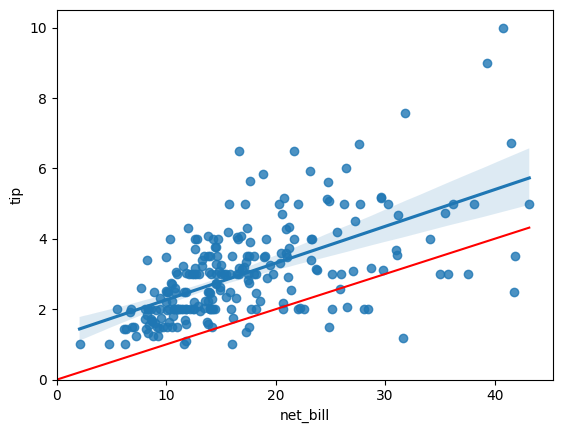

In [3]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(), 100)
y = 0.1 * x

plt.plot(x,y,'-r', label= 'Linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [7]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           5.02e-23
Time:                        14:36:13   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [6]:
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           1.52e-06
Time:                        14:36:08   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 4.536765947979814)

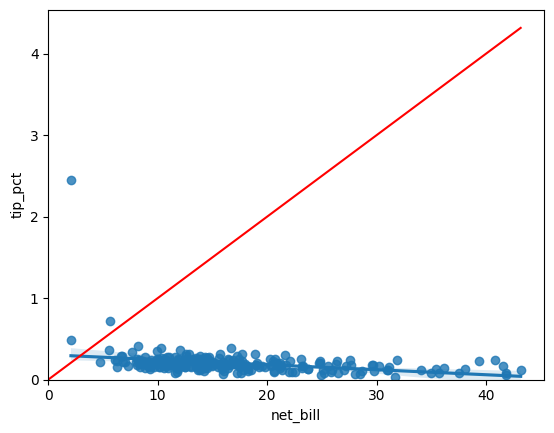

In [13]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

x = np.linspace(0,tips['net_bill'].max(), 100)
y = 0.1 * x

plt.plot(x,y,'-r', label= 'Linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

#### Comentário:
- No primeiro ajuste, o modelo de regressão de tip por net_bill, exibe o valor de 0.333 para o R². Já no segundo ajuste, o modelo de regressão de tip_pct por net_bill apresenta o R² no valor de 0.091. Sendo assim o melhor ajuste de modelo entre eles é o primeiro, pois o R-squared está mais próximo de 1.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [15]:
tips['tip_pct_pred'] = reg.fittedvalues

In [16]:
tips['tip_pred'] = tips['tip_pct_pred'] * tips['net_bill']

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pct_pred,tip_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,2.918050,46.630446
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.192915,19.034500
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.070031,53.756242
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.354125,68.323532
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.414719,71.640801


In [18]:
reg3 = smf.ols('tip ~ tip_pred', data = tips).fit()

In [19]:
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     109.4
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.25e-21
Time:                        15:05:19   Log-Likelihood:                -379.43
No. Observations:                 244   AIC:                             762.9
Df Residuals:                     242   BIC:                             769.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0381      0.118     17.318      0.000       1.806       2.270
tip_pred       0.0169      0.002     10.461      0.000       0.014       0.020
==============================================================================
Omnibus:                       24.311   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.221
Skew:                           0.635   Prob(JB):                     2.25e-08
Kurtosis:                       4.361   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Comentário: 4. compare esse  R2  com o do item 1
- Os dois modelos apresentam valores próximos, o primeiro (reg) com 0.333 e o modelo reg3 exibe o valor 0.311.
